<a href="https://colab.research.google.com/github/marcustux1/marcus_data_science/blob/master/modulo_01/Analisando_os_Dados_do_Airbnb_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Montreal, Canadá*

<img src="https://raw.githubusercontent.com/marcustux1/marcus_data_science/master/modulo_01/Montreal.png" height="150px">

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Com o detalhe que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

**Neste *notebook*, iremos analisar os dados referentes à cidade de Montreal, no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

---
Todos os dados usados aqui foram obtidos apartir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:


*   `listings.csv` - *Summary information and metrics for listings in Montreal (good for visualisations).*








In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/quebec-city/2020-05-10/visualisations/listings.csv")

## Análise dos Dados

---




**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel;
* `name` - Nome da propriedade anunciada;
* `host_id` - Número de id do proprietário (anfitrião) da propriedade;
* `host_name` - Nome do Anfitrião;
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido;
* `neighbourhood` - Nome do bairro;
* `latitude` - Coordenada da latitude da propriedade;
* `longitude` - Coordenada da longitude da propriedade;
* `room_type` - Informa o tipo de quarto que é oferecido;
* `price` - Preço para alugar o imóvel;
* `minimum_nights` - Quantidade mínima de noites para reservar;
* `number_of_reviews` - Número de reviews que a propriedade possui;
* `last_review` - Data do último review;
* `reviews_per_month` - Quantidade de reviews por mês;
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião;
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,54334,Beau logement avec vue magnifique sur les mont...,254811,Charlotte,NaN,Quartier 5-1,46.91400,-71.19565,Entire home/apt,100,3,89,2020-02-28,0.83,1,336
1,138381,Bed & Breakfast La California,675584,Mary,NaN,Sillery,46.76843,-71.26636,Private room,145,1,153,2019-12-15,1.41,2,343
2,198548,Fabulous view in heart of Québec,960772,Marianne,NaN,Saint-Roch,46.81233,-71.22545,Entire home/apt,150,15,47,2020-04-18,0.45,1,270
3,214967,Au bord du fleuve/Beach house,1110010,Julie,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.80286,-71.21271,Private room,85,4,160,2020-02-16,1.70,1,260
4,268812,Apartment Old city Quebec condo,1408583,Émilie,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.81023,-71.21082,Entire home/apt,40,30,77,2019-02-07,0.75,1,184


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.
Este *dataset* que baixamos arquivo `listings.csv` é a versão "resumida" do Airbnb.

In [5]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}")

# verificar o tipo de dados deste dataset
display(df.dtypes)


Entradas:	 2667
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A quantidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


*   É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
*   As variáveis `reviews_per_month` e `last_review` possuem 15% de valores nulos em suas linhas.
*   As demais variáveis não tem valores nulos ou faltantes.






In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.151106
last_review                       0.151106
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma.

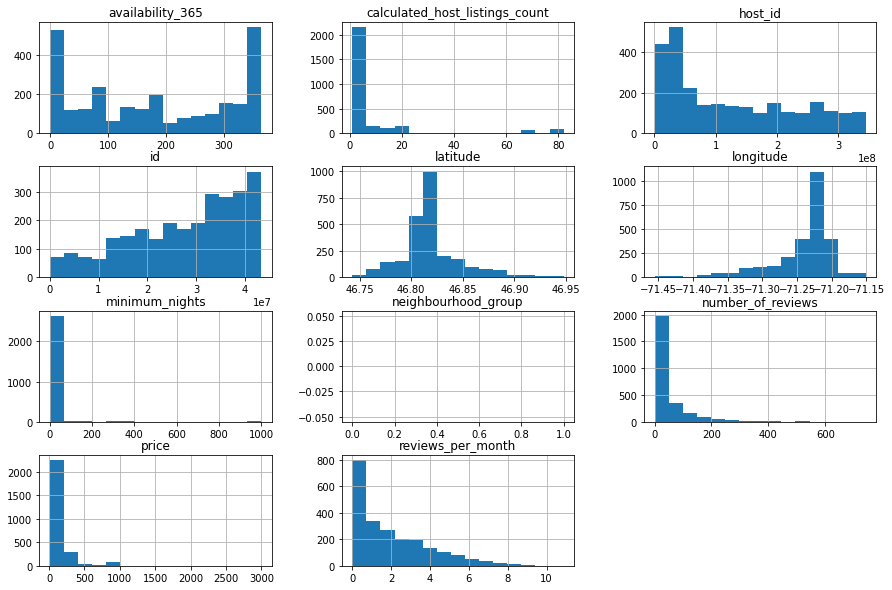

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Como podemos verificar, existem alguns outliers na variável ``price`` e ``minimum_nights``, vamos tratar esse dados logo abaixo:


### **Q4. Há outliers presentes?**

Pela Distribuição do Histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. 
Os valores não seguem uma distribuição e distorcem a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:



*   Resumo estatístico por meio do método `describe()`
*   Plotar boxplote para a variável.




In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2667.000000,2667.000000,2667.000000,2264.000000,2667.000000,2667.000000
mean,151.246719,10.220847,40.481815,2.068154,7.600675,179.536558
std,198.926177,43.914732,63.620793,1.967559,17.205040,134.346398
min,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,1.000000,2.000000,0.450000,1.000000,52.000000
50%,95.000000,2.000000,14.000000,1.440000,2.000000,173.000000
75%,155.000000,3.000000,52.000000,3.270000,4.000000,322.000000
max,3000.000000,1000.000000,743.000000,10.880000,82.000000,365.000000


Olhando o resumo estatístico acima, podemos confimar alguma hipóteses como:



*   A Variável `price` possui 75% do valor abaixo de 155,00 , porém seu valor máximo é 3000,00.
*   A quantidade mínima de noites (`minimum_nights`) está acima 365 dias no ano.



**Boxplot para minimum_nights**


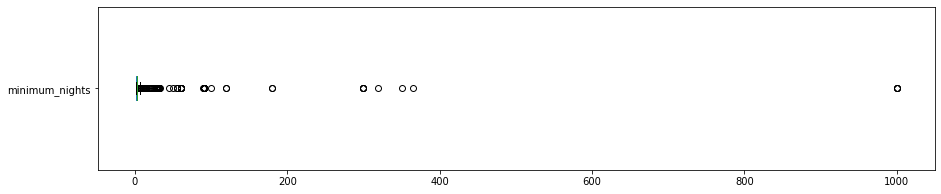

minimum_nights: valores acima de 30 dias: 
340 entradas
12.7484%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30 dias: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30])/ df.shape[0]*100)))

#### Boxplot para price

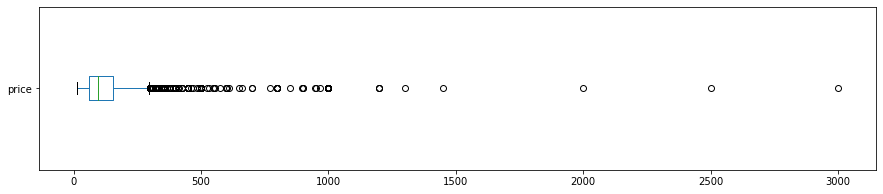

price: valores acima de 1500:
3 entradas
0.1125%


In [10]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 1500 para price
print("price: valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500])/ df.shape[0]*100)))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

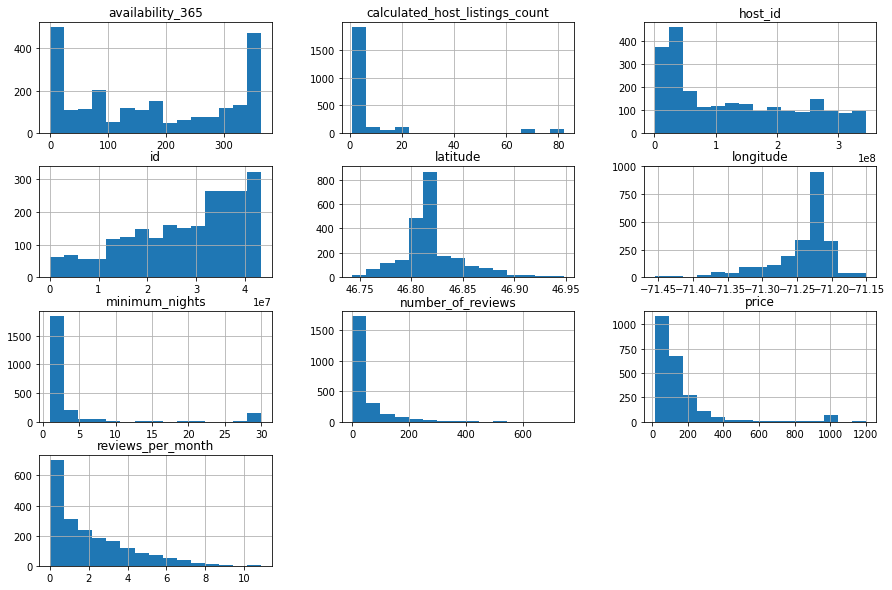

In [11]:
# remover os *Outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Pode se extrair a média dos preços dos aluguéis.
Neste momento não está sendo tratado valores *outliers*, valores que podem distorcer análise da média dos valores.


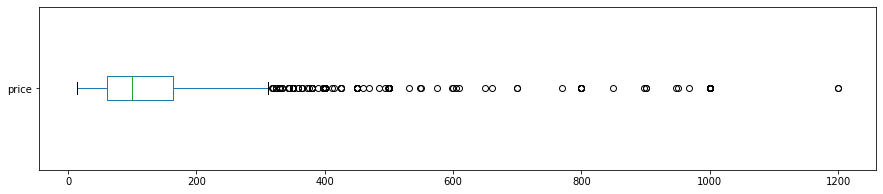

Média dos preços dos aluguéis: 154.70

price: valores acima da média
617 entradas
26.5491%


In [12]:
# ver a média da coluna `price`
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()
print(f'Média dos preços dos aluguéis: {df_clean["price"].mean():.2f}')
print(f"\nprice: valores acima da média" )
print(f'{len(df_clean[df_clean.price > 151.25])} entradas')
print(f'{(len(df_clean[df_clean.price > 151.25]) / df_clean.shape[0]*100):.4f}%')


### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.
Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qua a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:
*  Criar uma matriz de correlação;
*  Gerar um heatmap a partir dessa matriz, usando biblioteca `seaborn`

In [13]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.103359,-0.147677,-0.140707,0.651095,0.252331
minimum_nights,-0.103359,1.000000,-0.090193,-0.153964,-0.068307,-0.024259
number_of_reviews,-0.147677,-0.090193,1.000000,0.725999,-0.161747,0.048169
reviews_per_month,-0.140707,-0.153964,0.725999,1.000000,-0.198569,0.022744
calculated_host_listings_count,0.651095,-0.068307,-0.161747,-0.198569,1.000000,0.356743
availability_365,0.252331,-0.024259,0.048169,0.022744,0.356743,1.000000


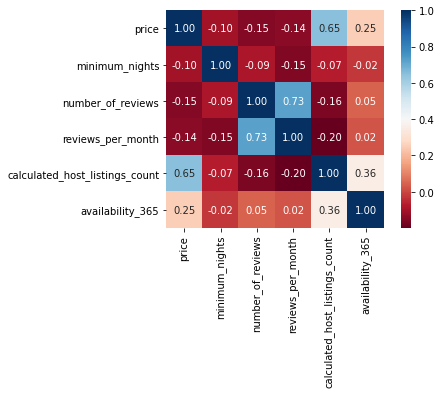

In [14]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.
*  `Entire home/apt` - Apartamento/casa inteira;
*  `Private room` - Quarto privado;
*  `Shared room` - Quarto Compartilhado;
*  `Hotem room` - Quarto de Hotel

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1651
Private room        610
Hotel room           42
Shared room          21
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.710413
Private room       0.262478
Hotel room         0.018072
Shared room        0.009036
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Montreal?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [17]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vieux-Québec/Cap-Blanc/Colline parlementaire    273.687651
Saint-Roch                                      234.620818
Saint-Jean-Baptiste                             159.495902
Quartier 5-1                                    156.550000
Quartier 5-4                                    140.940000
Cap-Rouge                                       128.157895
Saint-Émile                                     125.300000
Lac-Saint-Charles                               124.066667
Neufchâtel-Est/Lebourgneuf                      123.327273
Saint-Louis                                     121.136364
Name: price, dtype: float64

Acima, vemos que os Bairros Vieux-Quebec /Cap-Blanc / Colline parlementaire e Saint-Roch são os que possuem preço mais alto de hospedagem em Montreal.



Abaixo plotado os imóveis pela latitude/longitude apartir dos dados acima. E para se ter uma idéia uma imagem abaixo do mapa de Montreal.

<img src="https://raw.githubusercontent.com/marcustux1/marcus_data_science/master/modulo_01/Mapa_regiao_Montreal_Canada.jpg" height="150px">
By <a href="https://mapasblog.blogspot.com/2012/11/mapas-de-montreal-canada.html">Mapasblog</a>

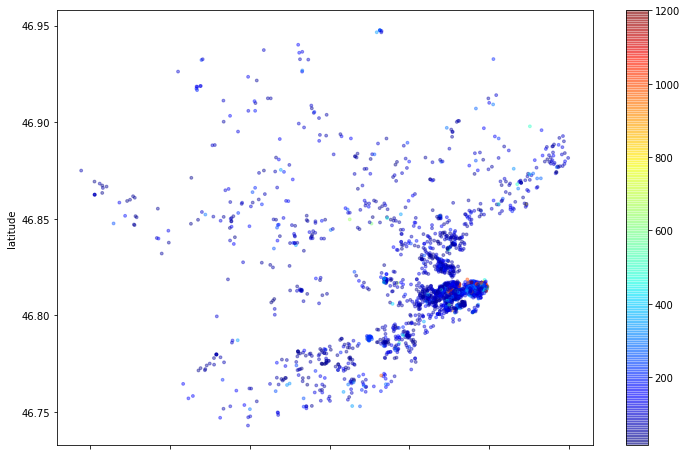

In [18]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [19]:
# ver a média da coluna `minimum_nights``
print(f"Média do mínimo de noites: {df_clean.minimum_nights.mean():.2f}")

Média do mínimo de noites: 3.90


## Conclusões


Em uma análise superficial desta base de dados do Airbnb `listings.csv`, já foi possível perceber que existem alguns *outliers* em algumas variáveis.
Este *dataset* é uma versão resumida, ideal para uma abordagem inicial. Em posterior análise exploratória será utilizado o conjunto de dados completo.